<a href="https://colab.research.google.com/github/irynagorbenko/data-science/blob/opi-radiomics/logistic_regression_05_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Read data from Google Drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default
creds, _ = default()
import mlxtend
gc = gspread.authorize(creds)
from google.colab import files

# Open our new sheet and add some data.
spreadsheet_t2w = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KdWPJXd2hyHcgdjeLFLjk9LSjkt-FXdj6-rJyKTmz40/edit#gid=1571581113')
rad_t2w= spreadsheet_t2w.worksheet('radiomics_t2w');

spreadsheet_sr = gc.open_by_url('https://docs.google.com/spreadsheets/d/1b_qinEAip4DRYcvUUINohJCVitVgWIX0fW3dkismDgI/edit#gid=1638783402')
sr= spreadsheet_sr.worksheet('AI4AR_PCa_radiological');

# get_all_values gives a list of rows.
# rows = rad_t2w.get('A1:AU1028')

In [13]:
type(sr)

gspread.models.Worksheet

In [14]:
import pandas as pd
df_t2w = pd.DataFrame(rad_t2w.get_all_records())
df_t2w.shape

(1027, 47)

In [15]:
df_sr = pd.DataFrame(sr.get_all_records())
df_sr.shape

(1072, 68)


#**scikit-learn**










In [1]:
# Import libraries for analysis in scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1. Example data

# The input and output should be NumPy arrays
x = np.arange(10).reshape(-1, 1) # The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. 
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # y is one-dimensional with ten items. Each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

In [3]:
# 2. Model

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y) # it fits the model and returns the model instance
# Important parameters

# penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
# C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.
# class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.
# solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
# max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
# multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.
# warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.
# n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.
# l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

# Warning
# 'liblinear' solver doesn’t work without regularization.
#'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
#'saga' is the only solver that supports elastic-net regularization.

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
# the example of binary classification, and y can be 0 or 1
model.classes_ 

array([0, 1])

In [7]:
# the intercept 𝑏₀ of the linear function 𝑓
model.intercept_

array([-1.04608067])

In [8]:
# the value of the slope 𝑏₁ of the linear function 𝑓
model.coef_

array([[0.51491375]])

In [9]:
# 3. Evaluate the Model

model.predict_proba(x) # returns the matrix of probabilities that the predicted output is equal to zero or one

# Each row corresponds to a single observation. 
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
# The actual predictions, based on the probability matrix and the values of 𝑝(𝑥)
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Returns the ratio of the number of correct predictions to the number of observations
model.score(x, y)

0.9

In [12]:
# Confusion matrix

#In the case of binary classification, the confusion matrix shows the numbers of the following:
# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

confusion_matrix(y, model.predict(x))
# Three true negative predictions: The first three observations are zeros predicted correctly.
# No false negative predictions: These are the ones wrongly predicted as zeros.
# One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
# Six true positive predictions: The last six observations are ones predicted correctly.

array([[3, 1],
       [0, 6]])

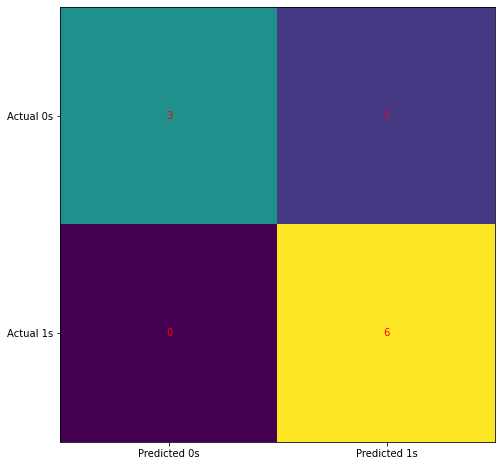

In [13]:
# Visualization of the confusion matrix

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
# Classification report

print(classification_report(y, model.predict(x)))

#  It returns a report on the classification as a dictionary if you provide output_dict=True or a string otherwise.

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [16]:
# 4. Improve the Model

# regularization strength C equal to 10.0, instead of the default value of 1.0
# the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
model.score(x, y)

1.0

In [17]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [18]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# **StatsModels**



In [19]:
# Import libraries
import numpy as np
import statsmodels.api as sm

In [21]:
# 1. DATA

# StatsModels doesn’t take the intercept 𝑏₀ into account, and you need to include the additional column of ones in x.
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x) # add_constant() takes the array x as the argument and returns a new array with the additional column of ones. 
# The first column of x corresponds to the intercept 𝑏₀. The second column contains the original values of x.

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [23]:
# 2. MODEL

# Create a Model and Train It
model = sm.Logit(y, x) # Note that the first argument here is y, followed by x.
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [24]:
# obtain the values of 𝑏₀ and 𝑏₁. The first element is the intercept 𝑏₀, the second is the slope 𝑏₁.
result.params

array([-1.972805  ,  0.82240094])

In [25]:
# 3. Evaluate the Model

result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [26]:
# Actual predicted outputs
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [27]:
# Confusion matrix
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [28]:
# Summary

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.4263
Time:                        12:35:47   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [29]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2023-02-07 12:36 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""